### Need for Model Calibration

1) Often times most of the models give false probabilities as the output, Here by false , I mean approximated probabilities rather than true probabilities.

2) In case our performance metrics is Log-Loss it is necessary to have true probabilties for  calculating the log loss.

3) In such cases where probability score is a requirement or log loss is the metric , it is recommended to calibrate Machine Learning/Deep Learing models. 

4) The more non linear the models are, the need of calibration is required/recommended.

5) We use platt scaling if the calibrated plot for non-calibrated model looks like a sigmoid function otherwise we use isotonic regression (in case of isotonic regression we need a lot of data)

In [1]:
#Importing the libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Importing the data
X, y = make_classification(n_samples=1000, n_classes=2, random_state=40)
x_train, x_test,y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=40)

# Non- Calibrated Model

In [3]:
support_vector = SVC()
support_vector.fit(x_train, y_train)
probs_1= support_vector.decision_function(x_test)

Here this is a calibration plot , the 45 degree line is the ideal line which is plot between y_observed (y-axis) and y_hat(predicted by the model x-axis)

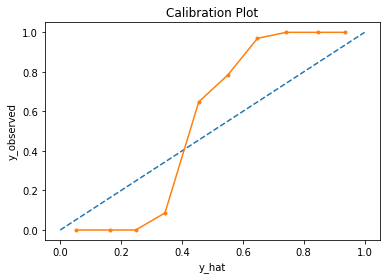

In [4]:
# Creating Calibrartion Plot
from sklearn.calibration import calibration_curve
y_hat_1,y_observation_1 = calibration_curve(y_test, probs_1, n_bins=10, normalize=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(y_observation_1,y_hat_1, marker='.')
plt.title('Calibration Plot')
plt.xlabel('y_hat')
plt.ylabel('y_observed')
plt.show()

# Calibrated Model Using Isotonic Regression

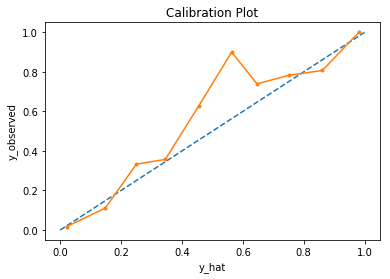

In [5]:
from sklearn.calibration import CalibratedClassifierCV
# Applying Isotonic Regression
calibrated = CalibratedClassifierCV(support_vector, method='isotonic', cv=5)
calibrated.fit(x_train, y_train)

#Predicting the probabilities of calibrated model
probs = calibrated.predict_proba(x_test)[:, 1]

# Calibration Plott
y_hat,y_observed = calibration_curve(y_test, probs, n_bins=10, normalize=True)

# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(y_observed, y_hat, marker='.')
plt.title('Calibration Plot')
plt.xlabel('y_hat')
plt.ylabel('y_observed')
plt.show()

# Calibrated Model Using Platts Scaling

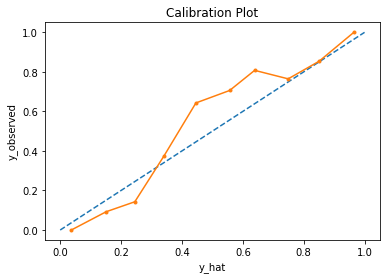

In [6]:
from sklearn.calibration import CalibratedClassifierCV
# Applying Isotonic Regression
calibrated_2 = CalibratedClassifierCV(support_vector, method='sigmoid', cv=5)
calibrated_2.fit(x_train, y_train)

#Predicting the probabilities of calibrated model
probs_2 = calibrated_2.predict_proba(x_test)[:, 1]

# Calibration Plott
y_hat_2,y_observed_2 = calibration_curve(y_test, probs_2, n_bins=10, normalize=True)

# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(y_observed_2, y_hat_2, marker='.')
plt.title('Calibration Plot')
plt.xlabel('y_hat')
plt.ylabel('y_observed')
plt.show()

# Conclusions
Comparing the three plots , we can see the calibrated models are more closer to the 45 degree line as compared to the non-calibrated model